# Malawi Election Dataset — Analysis & Insights

This notebook analyzes the Kaggle dataset **Malawi Election Dataset**.

Designed to run on Kaggle (add dataset) or locally after downloading the CSV.

Contents: Import libraries, Load dataset, Cleaning, EDA, 9 combined plots, Insights.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
# NOTE: %matplotlib inline is normally fine in Jupyter notebooks; keep if running in notebook
try:
    get_ipython().run_line_magic('matplotlib', 'inline')
except Exception:
    pass


In [13]:
# Please place the CSV in the working directory or adjust KAGGLE_PATH if running on Kaggle
KAGGLE_PATH = "/kaggle/input/malawi_elections_2004_2025.csv"
LOCAL_PATH = "malawi_elections_2004_2025.csv"

# choose dataset path robustly
if os.path.exists(KAGGLE_PATH):
    DATA_PATH = KAGGLE_PATH
    print("Dataset will be loaded from Kaggle path.")
elif os.path.exists(LOCAL_PATH):
    DATA_PATH = LOCAL_PATH
    print("Dataset will be loaded from local path.")
else:
    DATA_PATH = None
    print("⚠️ Dataset file not found. Set DATA_PATH to your CSV location.")

# load dataset if available
if DATA_PATH is not None:
    try:
        df = pd.read_csv(DATA_PATH)
        print("✅ Dataset loaded successfully. Shape:", df.shape)
    except Exception as e:
        print("❌ Error loading dataset:", e)
        df = None
else:
    df = None


Dataset will be loaded from local path.
✅ Dataset loaded successfully. Shape: (5000, 10)


In [14]:
# Quick peek and diagnostics
if df is not None:
    display(df.head())
    print('\nColumns and dtypes:')
    print(df.dtypes)
    print('\nMissing values:')
    print(df.isnull().sum())
    display(df.describe(include='all'))
else:
    print('No dataframe loaded. Please set DATA_PATH to the correct CSV file path.')


,Election_Year,Region,Ethnic_Group,Language,Education_Level,Population_Density,GDP_per_Capita,Candidate_Origin_Region,Voted_For,Election_Winner_Party
0,2004,Central,Lomwe,Chichewa,Primary,179,947,Southern,DPP,UDF
1,2004,Central,Lambya/Nyiha,Chichewa,Secondary,140,508,Central,MCP,UDF
2,2004,Central,Yao,Chichewa,Primary,374,744,Southern,AFORD,UDF
3,2004,Central,Tumbuka,Chichewa,Secondary,127,537,Southern,AFORD,UDF
4,2004,Southern,Lomwe,Chilomwe,Primary,394,1035,Central,DPP,UDF



Columns and dtypes:
Election_Year               int64
Region                     object
Ethnic_Group               object
Language                   object
Education_Level            object
Population_Density          int64
GDP_per_Capita              int64
Candidate_Origin_Region    object
Voted_For                  object
Election_Winner_Party      object
dtype: object

Missing values:
Election_Year              0
Region                     0
Ethnic_Group               0
Language                   0
Education_Level            0
Population_Density         0
GDP_per_Capita             0
Candidate_Origin_Region    0
Voted_For                  0
Election_Winner_Party      0
dtype: int64


,Election_Year,Region,Ethnic_Group,Language,Education_Level,Population_Density,GDP_per_Capita,Candidate_Origin_Region,Voted_For,Election_Winner_Party
count,5000.000000,5000,5000,5000,5000,5000.000000,5000.00000,5000,5000,5000
unique,NaN,3,10,5,4,NaN,NaN,3,10,3
top,NaN,Central,Lomwe,Chichewa,Primary,NaN,NaN,Central,DPP,DPP
freq,NaN,2261,519,2351,2485,NaN,NaN,2219,1482,3000
mean,2014.200000,NaN,NaN,NaN,NaN,229.954800,653.37120,NaN,NaN,NaN
std,7.360084,NaN,NaN,NaN,NaN,100.270524,221.89927,NaN,NaN,NaN
min,2004.000000,NaN,NaN,NaN,NaN,20.000000,100.00000,NaN,NaN,NaN
25%,2009.000000,NaN,NaN,NaN,NaN,157.000000,498.00000,NaN,NaN,NaN
50%,2014.000000,NaN,NaN,NaN,NaN,223.000000,645.00000,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,294.000000,801.00000,NaN,NaN,NaN


In [15]:
# Basic column detection and types
if df is not None:
    df.columns = [str(c).strip() for c in df.columns]
    possible_year_cols = [c for c in df.columns if 'year' in c.lower()]
    if possible_year_cols:
        YEAR_COL = possible_year_cols[0]
        try:
            df[YEAR_COL] = pd.to_numeric(df[YEAR_COL], errors='coerce')
        except Exception:
            pass
    else:
        YEAR_COL = None
    # numeric and categorical cols
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    # other useful column lists (votes/turnout/region/party)
    vcols = [c for c in df.columns if 'vote' in c.lower() or 'votes' in c.lower()]
    tcols = [c for c in df.columns if 'turnout' in c.lower()]
    rcols = [c for c in df.columns if 'region' in c.lower() or 'district' in c.lower()]
    party_cols = [c for c in df.columns if 'party' in c.lower()]
    print('Numeric columns:', num_cols)
    print('Categorical columns:', cat_cols)
    print('Detected vote cols:', vcols)
    print('Detected turnout cols:', tcols)
    print('Detected region/district cols:', rcols)
    print('Detected party cols:', party_cols)
else:
    print('No df loaded')


Numeric columns: ['Election_Year', 'Population_Density', 'GDP_per_Capita']
Categorical columns: ['Region', 'Ethnic_Group', 'Language', 'Education_Level', 'Candidate_Origin_Region', 'Voted_For', 'Election_Winner_Party']
Detected vote cols: ['Voted_For']
Detected turnout cols: []
Detected region/district cols: ['Region', 'Candidate_Origin_Region']
Detected party cols: ['Election_Winner_Party']


GDP or Year column not detected for GDP line plot


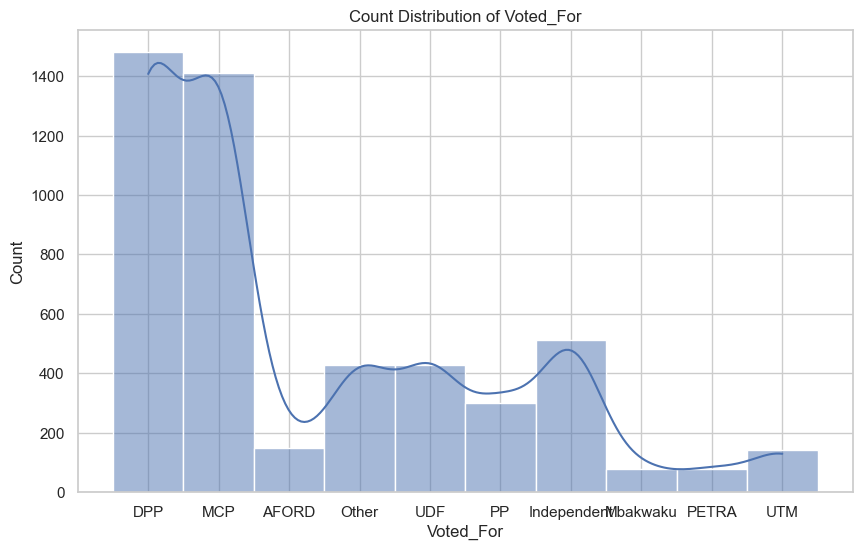

Region or Turnout column not found for turnout by region plot


In [20]:
# Some simple EDA plots (static) with guards to avoid NameError
if df is not None:
    # GDP line (if present)
    try:
        if any(c.lower()=='gdp' for c in df.columns) and YEAR_COL:
            gcol = [c for c in df.columns if c.lower()=='gdp'][0]
            gdf = df.groupby(YEAR_COL)[gcol].mean().reset_index()
            plt.figure(figsize=(10,5))
            plt.plot(gdf[YEAR_COL], gdf[gcol], marker='o')
            plt.title('Average GDP over Years')
            plt.xlabel('Year')
            plt.ylabel('GDP (mean)')
            plt.grid(True)
            plt.show()
        else:
            print('GDP or Year column not detected for GDP line plot')
    except Exception as e:
        print('Error plotting GDP line:', e)

    # Votes histogram
    try:
        if vcols:
            v = vcols[0]
            plt.figure()
            sns.histplot(df[v].dropna(), kde=True)
            plt.title(f'Count Distribution of {v}')
            plt.show()
        else:
            print('No votes column found for histogram')
    except Exception as e:
        print('Error plotting votes histogram:', e)

    # Turnout by region
    try:
        if rcols and tcols:
            r = rcols[0]
            t = tcols[0]
            tmp = df.groupby(r)[t].mean().sort_values(ascending=False).reset_index()
            plt.figure(figsize=(12,5))
            sns.barplot(x=t, y=r, data=tmp)
            plt.title('Average Turnout by Region')
            plt.show()
        else:
            print('Region or Turnout column not found for turnout by region plot')
    except Exception as e:
        print('Error plotting turnout by region:', e)
else:
    print('No df')


Error plotting party pie chart: could not convert string to float: 'UDFMCPIndependentDPPDPPMCPDPPOtherUDFAFORDPPDPPDPPOtherDPPPPMCPOtherPPDPPAFORDDPPDPPDPPUDFPPDPPDPPDPPMCPMCPMCPIndependentDPPMCPPPUDFMCPAFORDDPPIndependentIndependentAFORDMCPOtherDPPDPPPPDPPDPPAFORDMCPOtherDPPIndependentOtherDPPMCPIndependentAFORDUDFMCPDPPIndependentPPMCPMCPDPPMCPIndependentDPPDPPUDFMCPIndependentDPPDPPMCPDPPDPPMCPMCPDPPDPPMCPDPPDPPMCPOtherDPPDPPMCPMCPDPPIndependentMCPDPPIndependentDPPDPPMCPOtherMCPMCPDPPMCPMCPMCPDPPMCPAFORDAFORDDPPPPDPPAFORDOtherDPPDPPMCPDPPDPPMCPMCPDPPMCPMCPUDFAFORDDPPOtherDPPMCPMCPDPPDPPPPMCPDPPOtherPPDPPDPPDPPMCPMCPUDFMCPDPPMCPUDFOtherIndependentMCPPPUDFAFORDMCPDPPDPPMCPMCPDPPMCPMCPDPPAFORDDPPDPPMCPDPPDPPDPPIndependentPPMCPAFORDDPPAFORDMCPOtherMCPDPPAFORDMCPUDFMCPMCPMCPAFORDDPPUDFDPPUDFMCPMCPDPPMCPMCPOtherIndependentIndependentDPPOtherDPPUDFAFORDMCPDPPUDFMCPUDFDPPAFORDUDFDPPMCPMCPDPPMCPAFORDDPPDPPOtherMCPDPPMCPMCPMCPOtherMCPAFORDPPDPPDPPDPPUDFUDFMCPOtherMCPDPPDPPPPDPPMCPUDFMCPDPPMCP

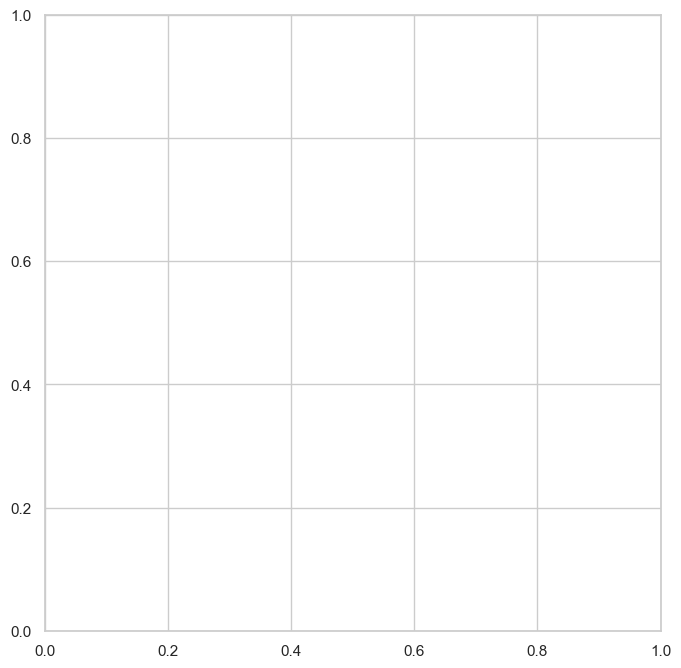

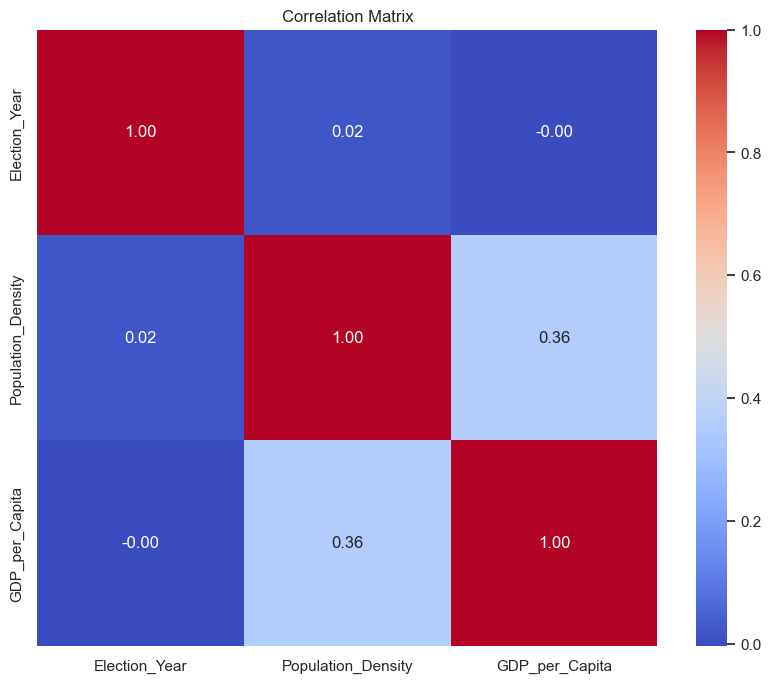

In [17]:
# Party share, previous vs current scatter, correlation heatmap
if df is not None:
    try:
        if party_cols and vcols:
            pcol = party_cols[0]
            agg = df.groupby(pcol)[vcols[0]].sum().sort_values(ascending=False)
            top = agg.head(8)
            others = agg.iloc[8:].sum() if len(agg) > 8 else 0
            pie_vals = list(top.values)
            pie_labels = list(top.index)
            if others>0:
                pie_vals.append(others)
                pie_labels.append('Others')
            plt.figure(figsize=(8,8))
            plt.pie(pie_vals, labels=pie_labels, autopct='%1.1f%%', startangle=140)
            plt.title('Party Vote Share (top parties)')
            plt.show()
        else:
            print('Party or votes column not found for pie chart')
    except Exception as e:
        print('Error plotting party pie chart:', e)

    try:
        prev_cols = [c for c in df.columns if 'previous' in c.lower() or 'prev' in c.lower()]
        curr_cols = vcols
        if prev_cols and curr_cols:
            plt.figure()
            sns.scatterplot(x=prev_cols[0], y=curr_cols[0], data=df, alpha=0.6)
            plt.title('Previous votes vs Current votes')
            plt.show()
        else:
            print('Previous votes or current votes columns not found for scatter')
    except Exception as e:
        print('Error plotting previous vs current votes:', e)

    try:
        if len(num_cols) >= 2:
            plt.figure(figsize=(10,8))
            corr = df[num_cols].corr()
            sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
            plt.title('Correlation Matrix')
            plt.show()
        else:
            print('Not enough numeric columns for correlation heatmap')
    except Exception as e:
        print('Error plotting correlation heatmap:', e)
else:
    print('No df')


C:\Users\zs\AppData\Local\Temp\ipykernel_12100\2494918284.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


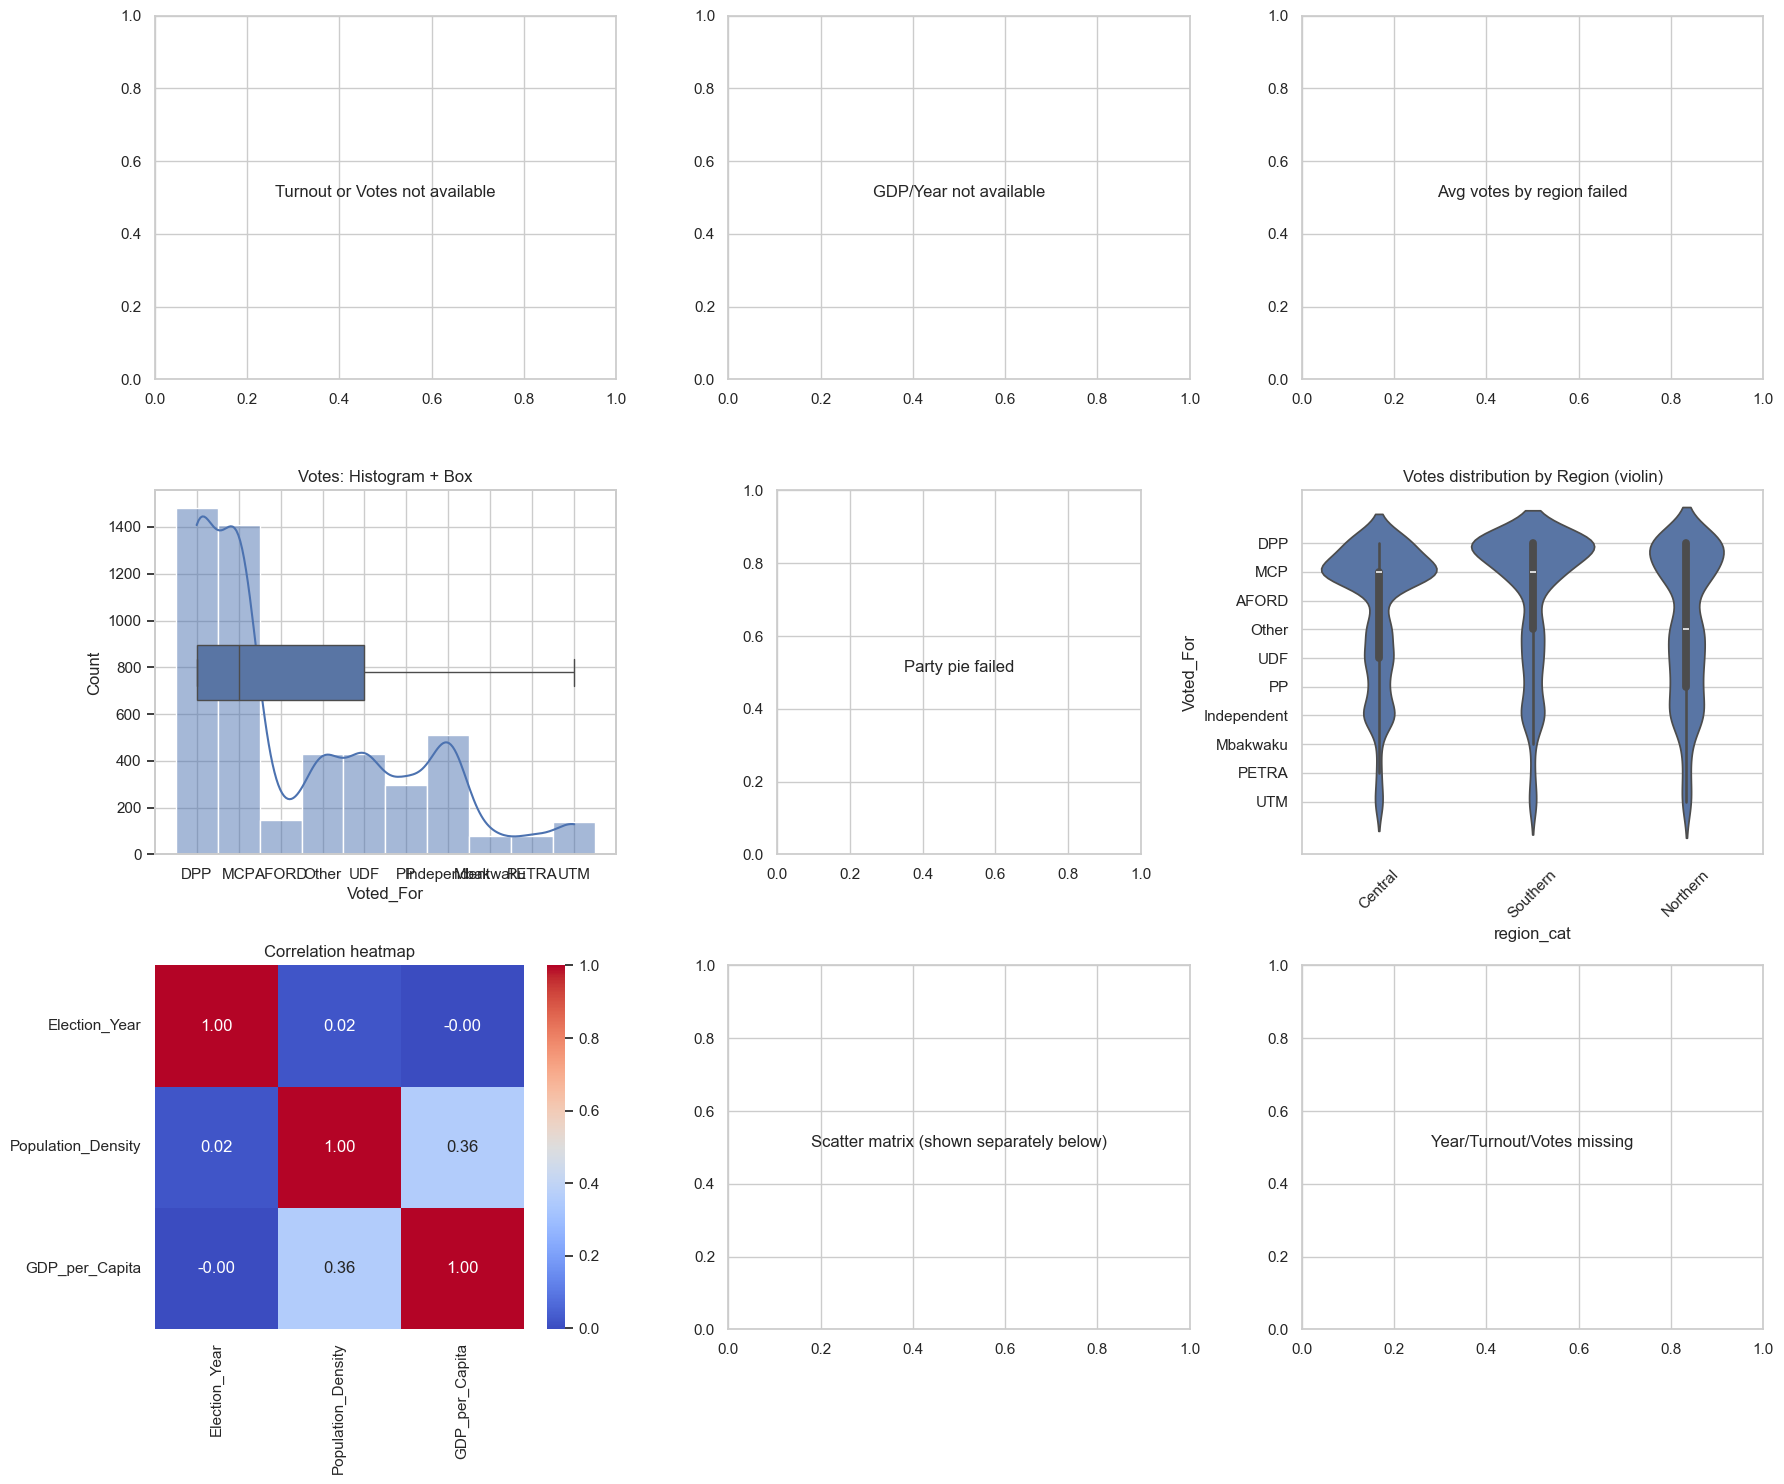

<Figure size 800x800 with 0 Axes>

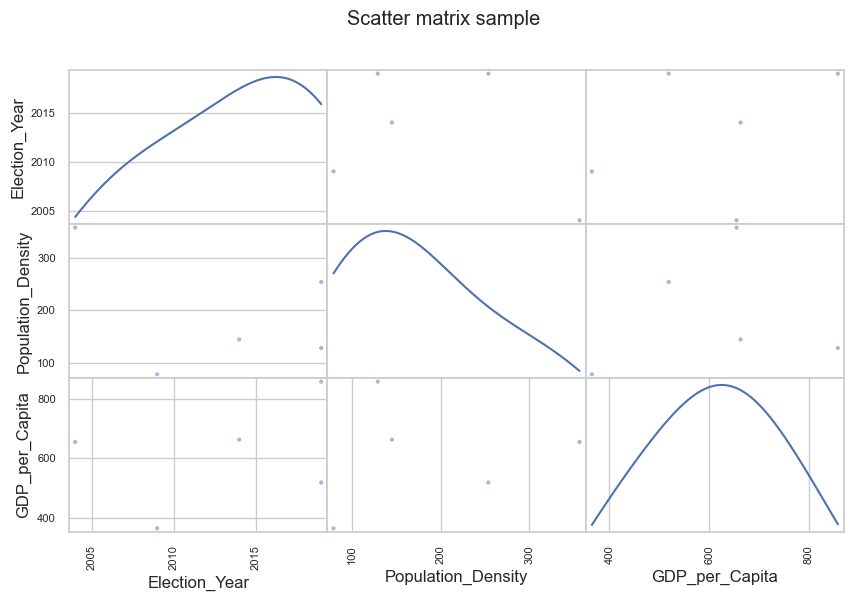

In [18]:
# 3x3 combined static plots with safer guards. Scatter matrix will be shown separately after this block.
if df is not None:
    # ensure variables exist
    vcols = globals().get('vcols', [c for c in df.columns if 'vote' in c.lower() or 'votes' in c.lower()])
    tcols = globals().get('tcols', [c for c in df.columns if 'turnout' in c.lower()])
    rcols = globals().get('rcols', [c for c in df.columns if 'region' in c.lower() or 'district' in c.lower()])
    party_cols = globals().get('party_cols', [c for c in df.columns if 'party' in c.lower()])
    num_cols = globals().get('num_cols', df.select_dtypes(include=[np.number]).columns.tolist())
    YEAR_COL = globals().get('YEAR_COL', None)
    # friendly names
    v = vcols[0] if vcols else None
    t = tcols[0] if tcols else None
    r = rcols[0] if rcols else None
    pcol = party_cols[0] if party_cols else None
    if YEAR_COL and YEAR_COL in df.columns:
        df['year'] = df[YEAR_COL]
    else:
        if 'year' not in df.columns:
            df['year'] = np.nan
    fig, axes = plt.subplots(3,3, figsize=(18,15))
    ax = axes[0,0]
    if t and v:
        try:
            sns.scatterplot(x=t, y=v, data=df, ax=ax)
            sns.regplot(x=t, y=v, data=df, scatter=False, ax=ax, color='red')
            ax.set_title('Turnout vs Votes (scatter + reg)')
        except Exception:
            ax.text(0.5,0.5,'Turnout vs Votes plot failed', ha='center')
    else:
        ax.text(0.5,0.5,'Turnout or Votes not available', ha='center')
    ax = axes[0,1]
    if 'gdp' in [c.lower() for c in df.columns] and YEAR_COL:
        try:
            gcol = [c for c in df.columns if c.lower()=='gdp'][0]
            gdf = df.groupby(YEAR_COL)[gcol].mean().reset_index()
            sns.lineplot(x=YEAR_COL, y=gcol, data=gdf, marker='o', ax=ax)
            ax.set_title('Average GDP over Years')
        except Exception:
            ax.text(0.5,0.5,'GDP plot failed', ha='center')
    else:
        ax.text(0.5,0.5,'GDP/Year not available', ha='center')
    ax = axes[0,2]
    if r and v:
        try:
            tmp = df.groupby(r)[v].mean().reset_index().sort_values(by=v, ascending=False)
            sns.barplot(x=v, y=r, data=tmp, ax=ax)
            sns.stripplot(x=v, y=r, data=df, ax=ax, color='black', alpha=0.4)
            ax.set_title('Avg Votes by Region (bar + strip)')
        except Exception:
            ax.text(0.5,0.5,'Avg votes by region failed', ha='center')
    else:
        ax.text(0.5,0.5,'Region or Votes missing', ha='center')
    ax = axes[1,0]
    if v:
        try:
            sns.histplot(df[v].dropna(), kde=True, ax=ax)
            ax2 = ax.twinx()
            sns.boxplot(x=df[v].dropna(), ax=ax2, width=0.15)
            ax.set_title('Votes: Histogram + Box')
            ax2.set_yticks([])
        except Exception:
            ax.text(0.5,0.5,'Votes histogram failed', ha='center')
    else:
        ax.text(0.5,0.5,'Votes missing', ha='center')
    ax = axes[1,1]
    if pcol and v:
        try:
            agg = df.groupby(pcol)[v].sum().sort_values(ascending=False)
            top = agg.head(6)
            ax.pie(top.values, labels=top.index, autopct='%1.1f%%')
            ax.set_title('Top party vote share')
        except Exception:
            ax.text(0.5,0.5,'Party pie failed', ha='center')
    else:
        ax.text(0.5,0.5,'Party or votes missing', ha='center')
    ax = axes[1,2]
    if r and v:
        try:
            df['region_cat'] = df[r].astype(str)
            sns.violinplot(x='region_cat', y=v, data=df, ax=ax)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
            ax.set_title('Votes distribution by Region (violin)')
        except Exception:
            ax.text(0.5,0.5,'Violin plot failed', ha='center')
    else:
        ax.text(0.5,0.5,'Region/Votes missing', ha='center')
    ax = axes[2,0]
    if len(num_cols)>=2:
        try:
            sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
            ax.set_title('Correlation heatmap')
        except Exception:
            ax.text(0.5,0.5,'Correlation heatmap failed', ha='center')
    else:
        ax.text(0.5,0.5,'Not enough numeric cols', ha='center')
    ax = axes[2,1]
    # We'll show a separate scatter matrix below instead of embedding it here
    ax.text(0.5,0.5,'Scatter matrix (shown separately below)', ha='center')
    ax = axes[2,2]
    if YEAR_COL and t and v:
        try:
            yearly = df.groupby(YEAR_COL).agg({t: 'mean', v: 'mean'}).reset_index()
            ax2 = ax.twinx()
            sns.lineplot(x=YEAR_COL, y=t, data=yearly, marker='o', ax=ax, label='Turnout')
            sns.barplot(x=YEAR_COL, y=v, data=yearly, alpha=0.4, ax=ax2)
            ax.set_title('Turnout (line) and Avg Votes (bar) by Year')
        except Exception:
            ax.text(0.5,0.5,'Yearly plot failed', ha='center')
    else:
        ax.text(0.5,0.5,'Year/Turnout/Votes missing', ha='center')
    plt.tight_layout()
    plt.show()
    # Separate scatter matrix (sample) to avoid subplot conflicts
    try:
        if len(num_cols) >= 2:
            plt.figure(figsize=(8,8))
            pd.plotting.scatter_matrix(df[num_cols].sample(min(5, len(df))), diagonal='kde')
            plt.suptitle('Scatter matrix sample')
            plt.show()
    except Exception as e:
        print('Scatter matrix not available or failed:', e)
else:
    print('No df')


In [19]:
# Interactive plots using Plotly (line, box, donut, scatter matrix, histogram)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

if df is not None:
    try:
        # Interactive: Average votes over years (line)
        if 'YEAR_COL' in globals() and YEAR_COL and vcols:
            yearly = df.groupby(YEAR_COL).agg({vcols[0]: 'mean'}).reset_index()
            fig = px.line(yearly, x=YEAR_COL, y=vcols[0], title='Average Votes Over Years (interactive)')
            display(fig)
        # Interactive: Votes by region (box)
        if rcols and vcols:
            fig = px.box(df, x=rcols[0], y=vcols[0], title='Votes by Region (boxplot)')
            display(fig)
        # Interactive: Donut (party share)
        if party_cols and vcols:
            agg = df.groupby(pcol)[vcols[0]].sum().reset_index()
            fig = px.pie(agg, names=pcol, values=vcols[0], hole=0.5, title='Donut: Party vote share')
            display(fig)
        # Interactive: scatter matrix sample
        if len(num_cols) >= 2:
            samp = df[num_cols].dropna().sample(min(200, len(df)))
            fig = px.scatter_matrix(samp, dimensions=samp.columns.tolist(), title='Interactive Scatter Matrix (sample)')
            display(fig)
        # Interactive: histogram of votes
        if vcols:
            fig = px.histogram(df, x=vcols[0], nbins=30, title='Interactive Histogram of Votes')
            display(fig)
    except Exception as e:
        print('Error creating interactive plots:', e)
else:
    print('No df - interactive plots skipped')


Error creating interactive plots: agg function failed [how->mean,dtype->object]


Notebook created by assistant. Run on Kaggle or locally after placing the CSV in the working directory.

What changed:\n- Robust guards to avoid NameError and other runtime errors.\n- Scatter matrix drawn separately to avoid subplot conflicts.\n- Added interactive Plotly charts: line, box, donut (pie with hole), scatter matrix, histogram.